<a href="https://colab.research.google.com/github/yiwang099/Adult-dataset-scikit-learn-project/blob/main/PracticeProjectPart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
# Read the records from the file
records = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

# Training and testing the set, remove the records contain unknown values
train = pd.read_csv('adult.data', sep = r',\s*', header = None, names = records, engine = 'python', na_values="?")
test = pd.read_csv('adult.test', sep = r',\s*', header = None, names = records, engine = 'python', skiprows = 1, na_values="?")
#test['income'] = test['income'].str.strip()
test['income'] = test['income'].str.replace(r'\.', '', regex=True)# Get away the period in the file
train = train.dropna()
test = test.dropna()

# Remove all continuous attributes, which: age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week
contAttr = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
train = train.drop(columns = contAttr)
test = test.drop(columns = contAttr)
#print(train.head())
#print(test.head())

# One-hot Encoding

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
# Use one-hot encoding to transform data
# Separate income from other attributes, because we will use income as the main attribute to distinguish the dataset
X_train = train.drop('income', axis=1)
y_train = train['income']

X_test = test.drop('income', axis=1)
y_test = test['income']
X_test_encoded = pd.get_dummies(X_test, drop_first=False)
#print("Data after encoded:") # For testing
#print(train_encoded.shape)

categorical_cols = X_train.select_dtypes(include=['object']).columns
#print("Categorical columns:", categorical_cols)

# Create and fit OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Transformation
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]), index=X_train.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]), index=X_test.index)

to_concat_train = [df for df in [X_train.drop(columns=categorical_cols), X_train_encoded] if not df.empty]
to_concat_test  = [df for df in [X_test.drop(columns=categorical_cols), X_test_encoded] if not df.empty]

X_train_final = pd.concat(to_concat_train, axis=1)
X_test_final  = pd.concat(to_concat_test, axis=1)

# Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Create the model for decision tree classifier
dt = DecisionTreeClassifier(random_state = 0)

# Train the model
dt.fit(X_train_final, y_train)

# Test the model
y_pred_dt = dt.predict(X_test_final)

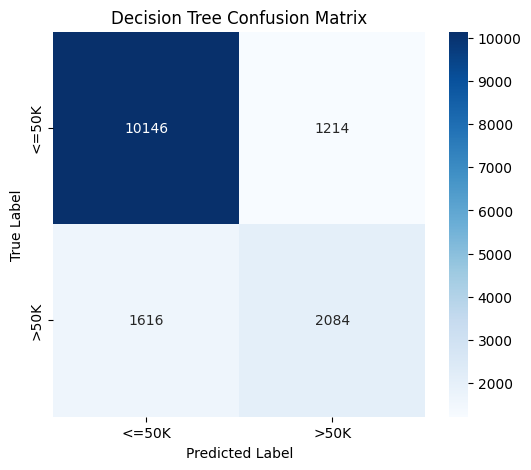

Decision Tree Report:
TP rate (Recall): 56.32%
FP rate: 10.69%
Precision: 63.19%
Recall: 56.32%
F1 Score: 59.56%


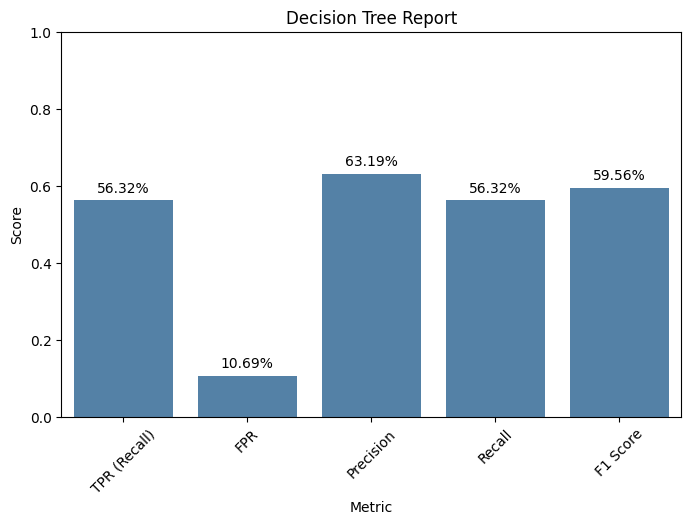

In [24]:
# Report accuracy by class including (TP rate, FP rate, precision, recall, F1)
# Confusion Matrix: [[TN, FP],
#            [FN, TP]]
cmDT = confusion_matrix(y_test, y_pred_dt, labels=['<=50K', '>50K'])
# Draw the confusion matrix out
plt.figure(figsize=(6,5))
sns.heatmap(cmDT, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix')
plt.show()

TN = cmDT[0,0]
FP = cmDT[0,1]
FN = cmDT[1,0]
TP = cmDT[1,1]

# Calculation indicators
TPrate = TP / (TP + FN)
FPrate = FP / (FP + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)  # same as TPrate
F1 = 2 * precision * recall / (precision + recall)

# Print the report
print("Decision Tree Report:")
print(f"TP rate (Recall): {TPrate*100:.2f}%")
print(f"FP rate: {FPrate*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {F1*100:.2f}%")

# Visualize the report as a graph
metrics = {
    'TPR (Recall)': TPrate,
    'FPR': FPrate,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': F1
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
plt.figure(figsize=(8,5))
sns.barplot(x='Metric', y='Value', data=metrics_df, color='steelblue')

plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Decision Tree Report')
plt.xticks(rotation=45)
for index, row in metrics_df.iterrows():
    plt.text(index, row['Value'] + 0.02, f"{row['Value']*100:.2f}%", ha='center')
plt.show()

# Naive Bayesian Classifier

In [25]:
from sklearn.naive_bayes import GaussianNB

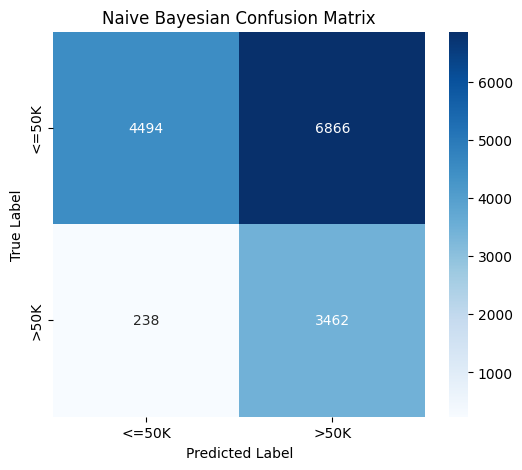

TP rate (Recall): 93.57%
FP rate: 60.44%
Precision: 33.52%
Recall: 93.57%
F1 Score: 49.36%


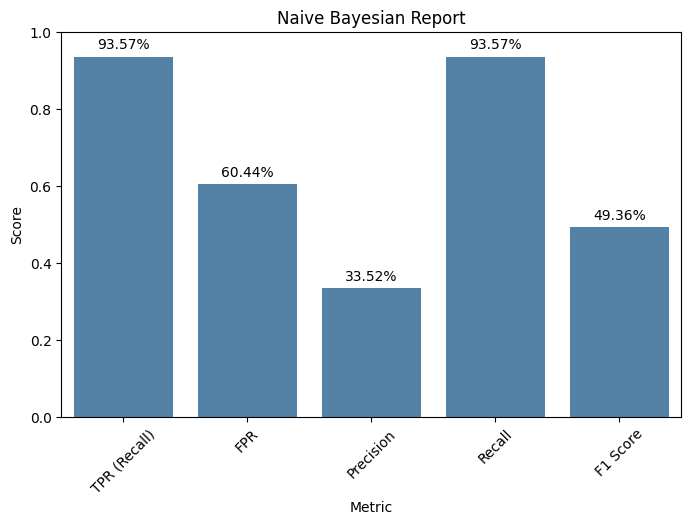

In [29]:
nb = GaussianNB()
nb.fit(X_train_final, y_train)
y_pred_nb = nb.predict(X_test_final)

cmNB = confusion_matrix(y_test, y_pred_nb, labels=['<=50K', '>50K'])

plt.figure(figsize=(6,5))
sns.heatmap(cmNB, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Naive Bayesian Confusion Matrix')
plt.show()

TN = cmNB[0,0]
FP = cmNB[0,1]
FN = cmNB[1,0]
TP = cmNB[1,1]

TPrate = TP / (TP + FN)
FPrate = FP / (FP + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2 * precision * recall / (precision + recall)

# Report accuracy by class including (TP rate, FP rate, precision, recall, F1)
print(f"TP rate (Recall): {TPrate*100:.2f}%")
print(f"FP rate: {FPrate*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {F1*100:.2f}%")

# Visualize the report as a graph
metrics = {
    'TPR (Recall)': TPrate,
    'FPR': FPrate,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': F1
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
plt.figure(figsize=(8,5))
sns.barplot(x='Metric', y='Value', data=metrics_df, color='steelblue')

plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Naive Bayesian Report')
plt.xticks(rotation=45)
for index, row in metrics_df.iterrows():
    plt.text(index, row['Value'] + 0.02, f"{row['Value']*100:.2f}%", ha='center')
plt.show()
